# CE-40717: Machine Learning

## HW7-Regression

### Please fill this part


1.   Full Name: Amir Pourmand
2.   Student Number: 99210259

In [2]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [45]:
dataset = pd.read_csv("ML2021S-HW7-data.csv")

df = dataset.to_numpy()
# implement the split part
# name them: x_train, x_test, y_train, y_test

train_count = int(0.8 * len(dataset))
x_train =df[:train_count,1]
y_train = df[:train_count,-1]

x_test = df[train_count:,1]
y_test =df[train_count:,-1]


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [197]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

bias=np.ones((x_train.shape[0],1))
biased_train = np.append( x_train[:,None],bias,axis=1)

m = np.linalg.inv(biased_train.T @ biased_train)@ (biased_train.T @ y_train)
m

array([-1.02641738,  0.81500634])

In [116]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y,y_train)
test_error = mean_squared_error(predicted_test_y,y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32467763017774226
MSE test error: 0.354495119213003


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

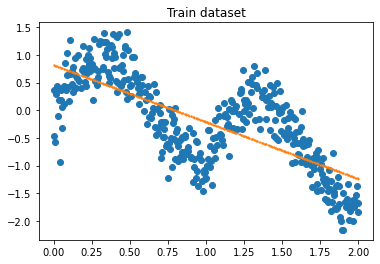

In [117]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

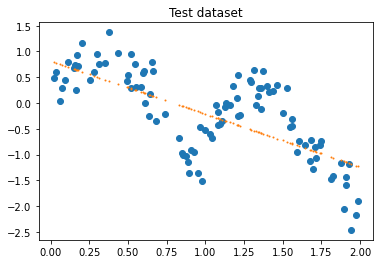

In [118]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.


No, The error is too high. 
The Line is best line that fits but we should also try other models. 
The model is clearly not suitable for this dataset.

Main problem is that a single line can't fit sin or cos or anything like that. 

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, I expect that it would work better

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [145]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        vector = xi - the_query_point
        W[i, i] = np.exp(-1/(2*hyperparameter**2) * (vector @ vector.T))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [163]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X[:,None], np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.pinv( X.T @ W @ X) @ (X.T @ W @ train_Y).T
    
    return np.dot(qx, theta).item(0)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [165]:
predicted_test = [predict(x_train, y_train, query, hyperparameter=0.10) for query in x_test]
error = mean_squared_error(predicted_test,y_test)
print(f"MSE test error: {error}")

MSE test error: 0.10590729682860779


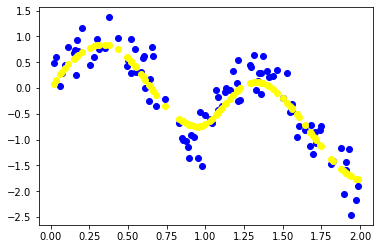

In [166]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, performance is clearly better. It's actually 1/3 of error in normal linear regression. The reason is that we put weight to the input values and this way we can fit more flexible models. 

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes, KNN has prooven to show very good results. Why not test it?!



### Part10:
Implementing the `KNN model`.

In [176]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.abs(x1-x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distances = self.distance(self.X,x) # find indices of k nearest neighbours to x
        indices = np.argsort(distances)[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y=0
        for item in neareest_indices:
            predicted_y += self.Y[item]
        predicted_y = predicted_y / self.k
        return predicted_y

In [177]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(predicted_y,y_test)
    return error, predicted_y

In [178]:
k = 3
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.10301733310578777


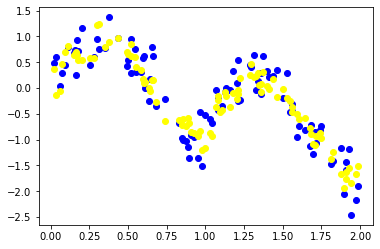

In [179]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, It actually performs very well. The good point is that with default parameters, i.e. k=3 , it performed very well! 
we can also see that the plot shows very good fit to data. 

min of k would be: 19 Min of error would be 0.09687363389746836


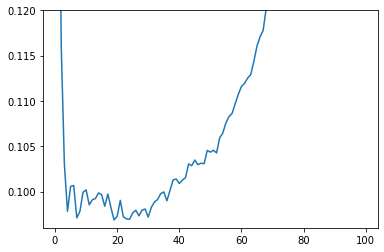

In [196]:
error_array = []
limit =100

min_error,min_k = None,None

for k in range(1,limit): 
    error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
    error_array.append(error_knn)
    
    if k == 1:
        min_error = error_knn
        min_k = k
    
    if error_knn < min_error:
        min_error = error_knn
        min_k = k
        

plt.plot(np.arange(1,limit),error_array)
plt.ylim(0.096,0.12)
print('min of k would be:', min_k,'Min of error would be',min_error )